In [264]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats 

In [265]:
df = pd.read_csv('engineered_data.csv')
df = df[df['crop_type'] == 'IC']

In [266]:
df.describe()

/home/kabs/miniconda3/envs/mulreg/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:4653: RuntimeWarning:

invalid value encountered in subtract



,biomass_seed,plant_density,density_relative,n_amount,interrow,irrigation_amount,p_amount,plot_long,soil_awc,soil_clay,...,total_precipitation,total_solar_radiation,high_humidity_days,growing_days,density_error,density_n_ratio,crowding,soil_water_capacity,NUE,GDD
count,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,...,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,134.000000,526.000000
mean,1.827832,114.139359,0.556578,22.733840,0.156536,3.676806,5.186312,2.421117,285.430064,0.223759,...,1511.567338,9593.167985,379.501901,188.334601,-8.090679,inf,0.074144,-0.223308,0.039189,1946.026100
std,1.106310,86.764848,0.220641,44.145533,0.014730,15.550291,17.593924,3.436047,27.706269,0.089419,...,132.374561,1073.129473,118.029468,59.609413,25.862916,NaN,0.262255,0.366636,0.031249,783.152270
min,0.102500,10.288066,0.050000,0.000000,0.120000,0.000000,0.000000,-1.550000,70.000000,0.040000,...,1255.580000,6893.250000,273.000000,83.000000,-83.838384,0.083284,0.000000,-0.577789,0.004843,594.488304
25%,0.949099,38.822751,0.500000,0.000000,0.145000,0.000000,0.000000,1.496384,291.500000,0.181875,...,1401.490000,9015.770000,289.000000,123.000000,-17.303942,4.280472,0.000000,-0.521055,0.016610,1393.206566
50%,1.550109,103.926200,0.500000,0.000000,0.162000,0.000000,0.000000,1.501086,291.500000,0.240000,...,1532.130000,10190.420000,336.000000,232.000000,-4.725248,NaN,0.000000,-0.374000,0.030406,1888.098447
75%,2.473669,149.408144,0.500000,30.000000,0.165000,0.000000,0.000000,1.503090,291.500000,0.260000,...,1590.930000,10345.180000,459.000000,244.000000,2.471451,NaN,0.000000,0.230312,0.049554,2771.943211
max,6.221384,409.090909,1.300000,180.000000,0.180000,105.000000,66.000000,16.120100,333.000000,0.420000,...,2123.880000,11463.440000,649.000000,256.000000,246.969697,inf,1.000000,0.362050,0.149723,2940.977404


For a *plant density optimization* project, your EDA should center on understanding how *planting density*, *environmental conditions*, and *management practices* affect **yield (biomass_seed) and NUE**. Here are the best EDA questions for your goal:

---

### 🌿 Core Objective: *Density vs. Yield*

1. **How does plant_density correlate with biomass_seed?**
2. **What is the optimal density_relative or density_factor range for high yield?**
3. **Do density_error and crowding impact yield or NUE negatively?**
4. **How does density_n_ratio relate to biomass_seed and NUE?**

---

### ⚙️ Management & Fertilization

5. **How do different management, cultivar, and n_fertilisation_type strategies affect yield at varying densities?**
6. **Is there an interaction between n_amount and plant_density on yield/NUE?**
7. **Do cultivar_mix or mixture_design outperform monocultures at higher densities?**

---

### ☀️ Environmental Influences

8. **Does soil_water_capacity moderate the effect of density on yield?**
9. **Are yield responses to density different under high GDD, heat_stress_days, or total_precipitation?**
10. *Is there a density threshold beyond which stress factors (e.g., heat, humidity) reduce yield sharply?*

---

### 📍 Location and Crop Factors

11. *Are there regional or `site`-based differences in optimal planting density?*
12. **Do specific species, plant_family, or previous_crop types benefit more from denser planting?**

---

### 📊 Yield Targeting

13. *What are the density conditions in the top 10% highest-yielding plots?*
14. *Can we cluster observations into low, medium, and high-yield zones based on density-related features?*

---

These questions will guide both your exploratory analysis and the direction of your modeling for optimization. Let me know if you'd like them broken down into visualization types.

### Density vs. Yield

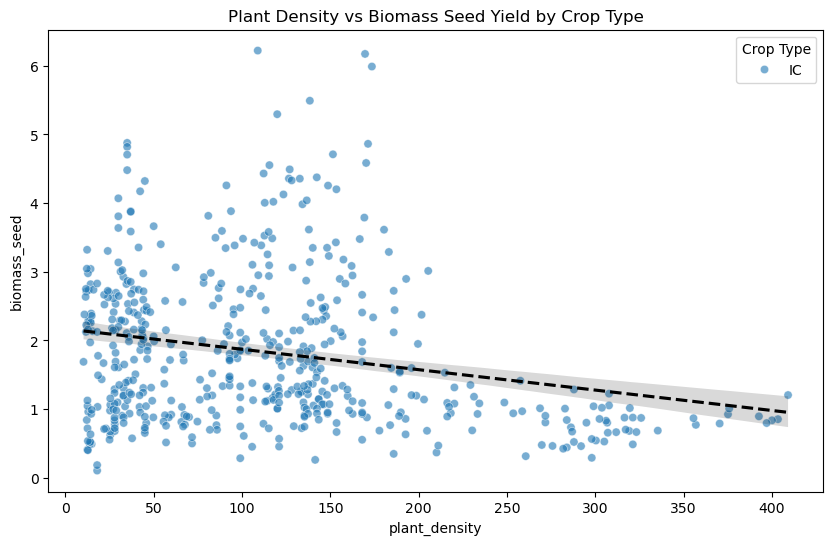

In [267]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, 
                x='plant_density', 
                y='biomass_seed',
                hue='crop_type',
                alpha=0.6)

plt.title('Plant Density vs Biomass Seed Yield by Crop Type')
plt.xlabel('Plant Density (plants/unit area)')
plt.ylabel('Biomass Seed Yield')

# Add a trend line
sns.regplot(data=df, 
            x='plant_density', 
            y='biomass_seed',
            scatter=False,
            color='black',
            line_kws={'linestyle': '--'})

plt.legend(title='Crop Type')
plt.show()

The chart shows a flat regression line in which signifies that there is almost no strong linear relationship between absolute plant density and seed yield. This implies that even when adding more plants per area doesn't really guarantee a higher yield

In [268]:
df['crop_type'].value_counts()

crop_type
IC    526
Name: count, dtype: int64

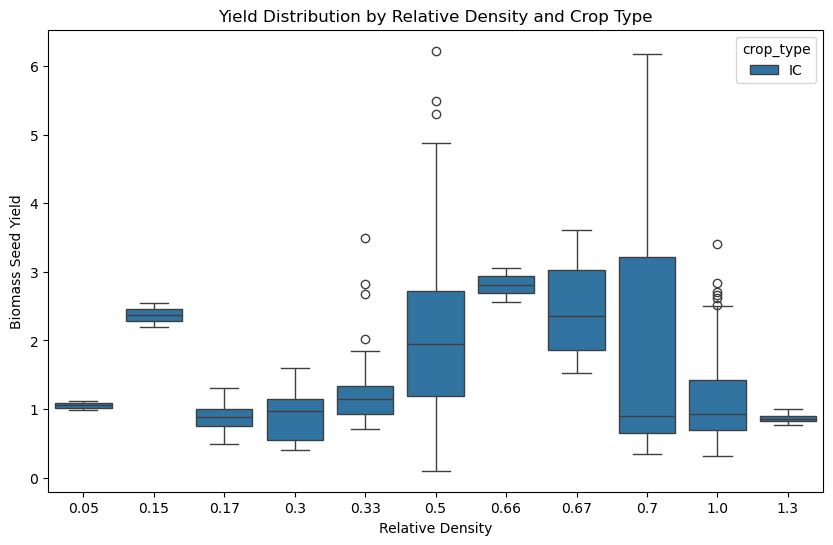

In [269]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df,
            x='density_relative',
            y='biomass_seed',
            hue='crop_type')

plt.title('Yield Distribution by Relative Density and Crop Type')
plt.xlabel('Relative Density')
plt.ylabel('Biomass Seed Yield')
plt.show()

The yields have peaked around the 0.5 relative density or the half of the standard density. Sole crops (SC) in particular has shown the highest peak. Given in both very low (<0.3>) and very high (>1.0) relative densities show lower median yields. Additionally, with intercropping (IC) has the tendencies to underperform sole crops at mid-densities. This implies that there's an optimal window, roughly 0.4-0.7 relative density in maximizing biomass seed.

In [270]:
df['NUE'].isnull().sum()

np.int64(392)

In [271]:
df['NUE'].info()

<class 'pandas.core.series.Series'>
Index: 526 entries, 0 to 631
Series name: NUE
Non-Null Count  Dtype  
--------------  -----  
134 non-null    float64
dtypes: float64(1)
memory usage: 8.2 KB


In [272]:
# group_medians = df.groupby('plant_family')['NUE'].median()
# df['NUE'] = df['NUE'].fillna(df['plant_family'].map(group_medians))

In [273]:
df['NUE'] 

0           NaN
1           NaN
2           NaN
3           NaN
4      0.034544
         ...   
627         NaN
628         NaN
629         NaN
630         NaN
631         NaN
Name: NUE, Length: 526, dtype: float64

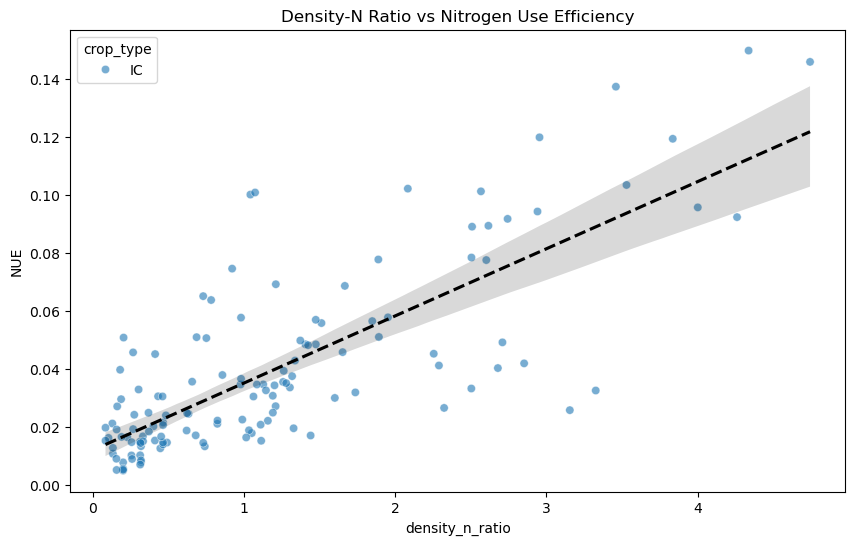

In [274]:
# Filter out rows where NUE is not null
df_nue = df[df['NUE'].notna()]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_nue,
                x='density_n_ratio',
                y='NUE',
                hue='crop_type',
                alpha=0.6)

plt.title('Density-N Ratio vs Nitrogen Use Efficiency')
plt.xlabel('Density-N Ratio')
plt.ylabel('NUE')

# Add trend line
sns.regplot(data=df_nue,
            x='density_n_ratio',
            y='NUE',
            scatter=False,
            color='black',
            line_kws={'linestyle': '--'})

plt.show()

Here we can see that there is a strong positive linear relationship between density_n_ratio (plants per unit of N applied) and nitrogen use efficiency. The regression line along with its confidence band confirms fields where you "spread" a given amount of N across more plants tend to extract and convert the N into biomass more efficiently. In this graph we could say that this is a very strong predictor of efficiency. 

Preserve structural missingness: When n_amount = 0, treat NUE as structurally missing. Do not insert an arbitrary number (like 0 or a very large number), because that would distort the biology. These entries should remain NA or be specially flagged to indicate “no N input”.

**Implications for Modeling & Data Mining**

**Density_n_ratio is a prime predictor—models that include it (rather than raw N or raw density) will naturally capture most of the NUE variance.**

**Crop_type adds nuance—while both IC and SC share the same slope, SC trials occupy the high-end regime. Encoding crop_type as a categorical feature will let the model adjust its intercept for each system.**

**Feature transformation—because the relationship is so linear and strong, a simple interaction term or even a univariate model on density_n_ratio could rival more complex multivariate approaches for predicting NUE.**

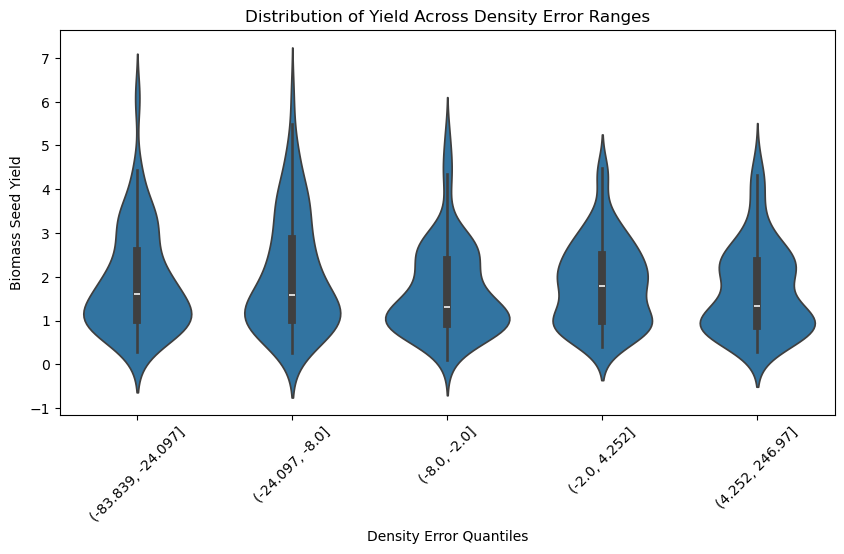

In [275]:
plt.figure(figsize=(10, 5))
sns.violinplot(data=df,
               x=pd.qcut(df['density_error'], q=5),  # Split into 5 quantiles
               y='biomass_seed')

plt.title('Distribution of Yield Across Density Error Ranges')
plt.xlabel('Density Error Quantiles')
plt.ylabel('Biomass Seed Yield')
plt.xticks(rotation=45)
plt.show()

The violin plot above is dividd into 5 groups, in which each of them represent a range of density error, which is the difference between actual and target plant count. The 4th group from the left shows a density error where density error is the smallest, meaning it hit the target stand almost exactly. This portrays the highest median seed biomass and the narrowest spread, where most of the trials in this bin cluster tightly around strong yields.

This implies that density_error harms yield, that when the closer it is to stick to planned density, the better the yields. Both underdensity and overdensity depress biomass_seed compared with a properly established stand.

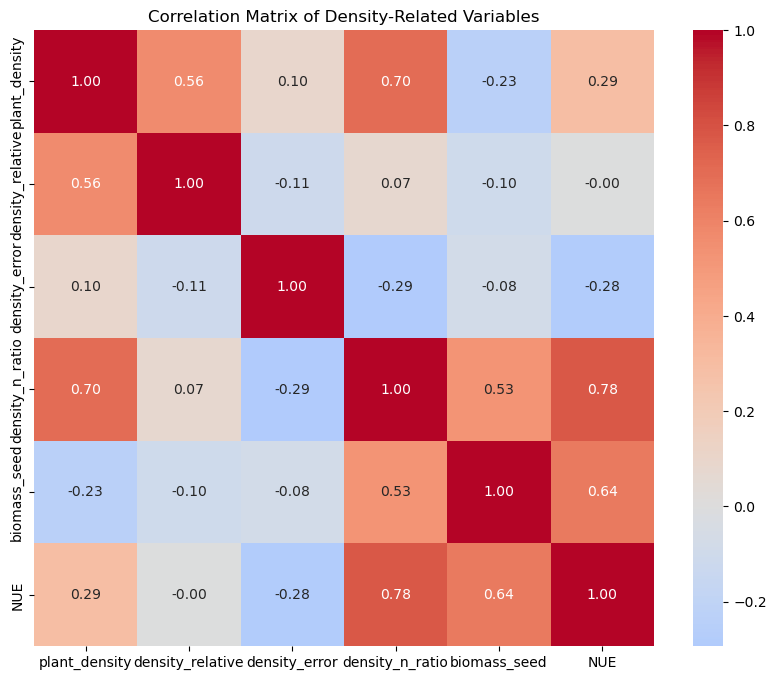

In [276]:
# Select relevant numeric columns
density_cols = ['plant_density', 'density_relative', 'density_error', 
                'density_n_ratio', 'biomass_seed', 'NUE']
correlation_matrix = df[density_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f')

plt.title('Correlation Matrix of Density-Related Variables')
plt.show()

Highlights a very strong correlation between density_n_ratio and NUE which is +78%

### Management & Fertilisation

In [277]:
# Create density categories for better visualization
df['density_category'] = pd.qcut(df['plant_density'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

In [278]:
import plotly.express as px
fig = px.scatter(df, 
                 x='plant_density',
                 y='biomass_seed',
                 color='management',
                 size='n_amount',
                 hover_data=['crop_type', 'NUE'],
                 title='Plant Density vs Yield with Management Practices')

fig.show();

As seen in the trend of the data, there is a positive trend but non-linear density-yield relationship. THe biomass_seed ibncreases with plan_density up to 150 plants/unit area, after which gains taper off and become much more variable.

Moreover, we see as the density increases, diminishing of returns get more prevalent. Larger bubbles (higher n_amount) at > 200 plants often do not translate into the top yields seen at middle densities indicating an interaction where excess N cannot compensate for over-crowding.

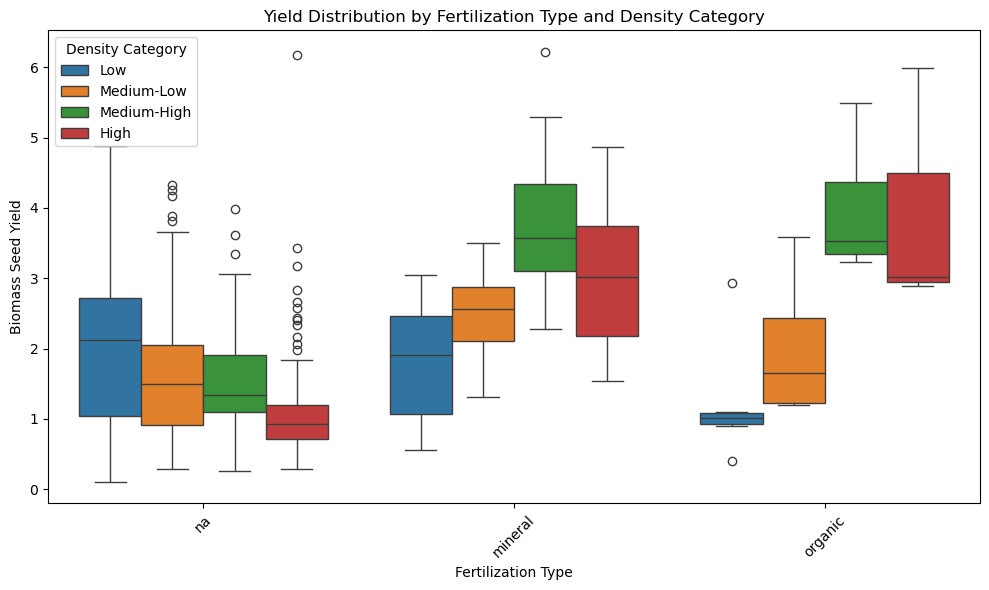

In [279]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df['n_fertilisation_type'].notna()],
            x='n_fertilisation_type',
            y='biomass_seed',
            hue='density_category')

plt.title('Yield Distribution by Fertilization Type and Density Category')
plt.xlabel('Fertilization Type')
plt.ylabel('Biomass Seed Yield')
plt.xticks(rotation=45)
plt.legend(title='Density Category')
plt.tight_layout()
plt.show()

Accross the density bins, the no fertiliser "na" bins yields are uniformly low, in which median yields stay below the 2 kg/ha. This implies that density alone cannot drive yield without N input (fertilisation). Along with the no fertiliser bins, the organic fertiliser yields increase with density which suggest that with organic N, it shows effectiveness but less potent than the mineral. Having to use mineral as the form of fertiliser shows the strongest density response in which median yield rose from 2 kg/ha at low density to 5 kh/ha at high density, and it shows the largest IQR and highest outliers that peaked around 9 kg/ha.

However, even with the use of mineral, the variance at the hgihest density is still large.

**Model implication: Include Fertilization Type as a key categorical feature (one-hot or embedding) and interact it with density.
Engineer interaction terms: e.g. density × (fert_type == “mineral”) or density × (fert_type == “organic”).**

In [280]:
import plotly.express as px
import plotly.graph_objects as go

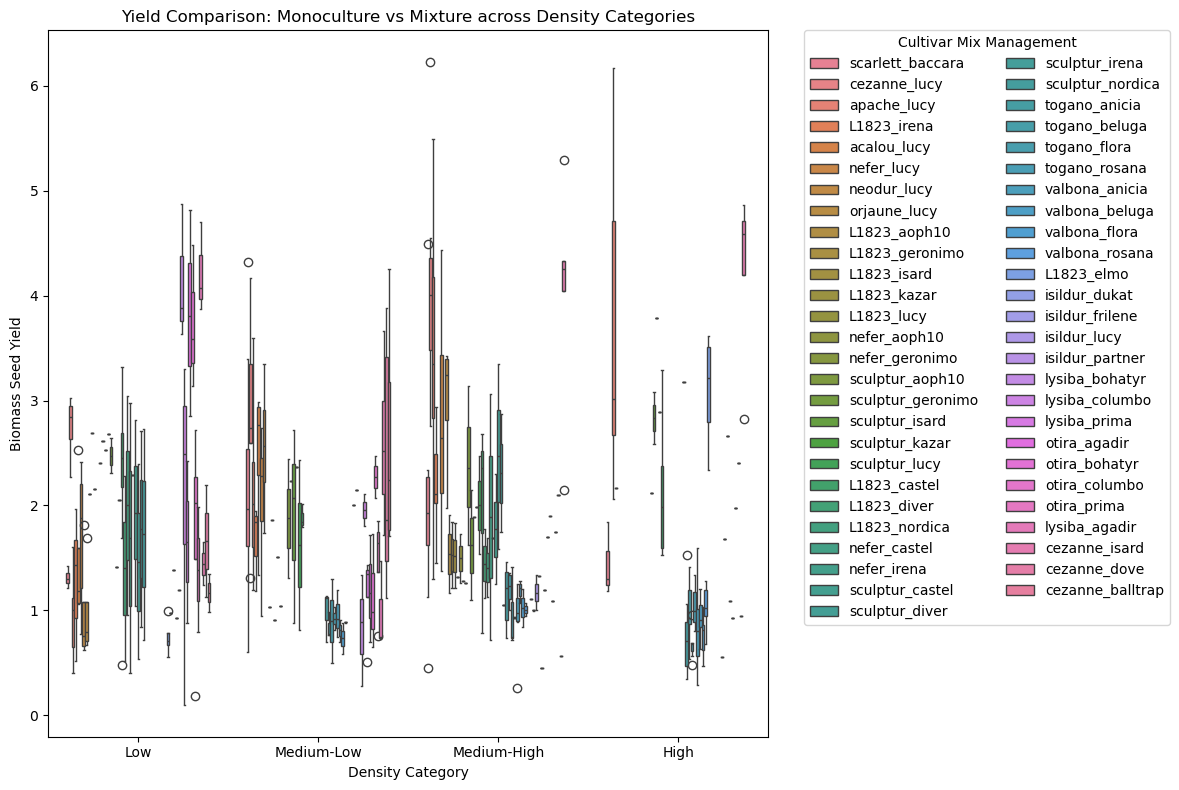

In [281]:
# Compare monoculture vs mixture yields
plt.figure(figsize=(12, 8))  # Made figure slightly taller to accommodate legend

sns.boxplot(data=df,
            x='density_category',
            y='biomass_seed',
            hue='cultivar_mix_management')

plt.title('Yield Comparison: Monoculture vs Mixture across Density Categories')
plt.xlabel('Density Category')
plt.ylabel('Biomass Seed Yield')

# Adjust legend to be more compact
plt.legend(title='Cultivar Mix Management',
          bbox_to_anchor=(1.05, 1),  # Position legend to the right of the plot%
          loc='upper left',  # Align to upper left of bbox_to_anchor
          ncol=2,  # Split into 2 columns to reduce vertical space
          borderaxespad=0)

# Adjust layout to prevent legend cutoff
plt.tight_layout()
plt.show()

Too many categories: this chart is visually overloaded. For analysis, collapse to “pure stands vs. mixture” or highlight only the top 5 combos.

Sparse extremes: many mixtures appear only once or twice, treat those as “other” in modeling to reduce noise

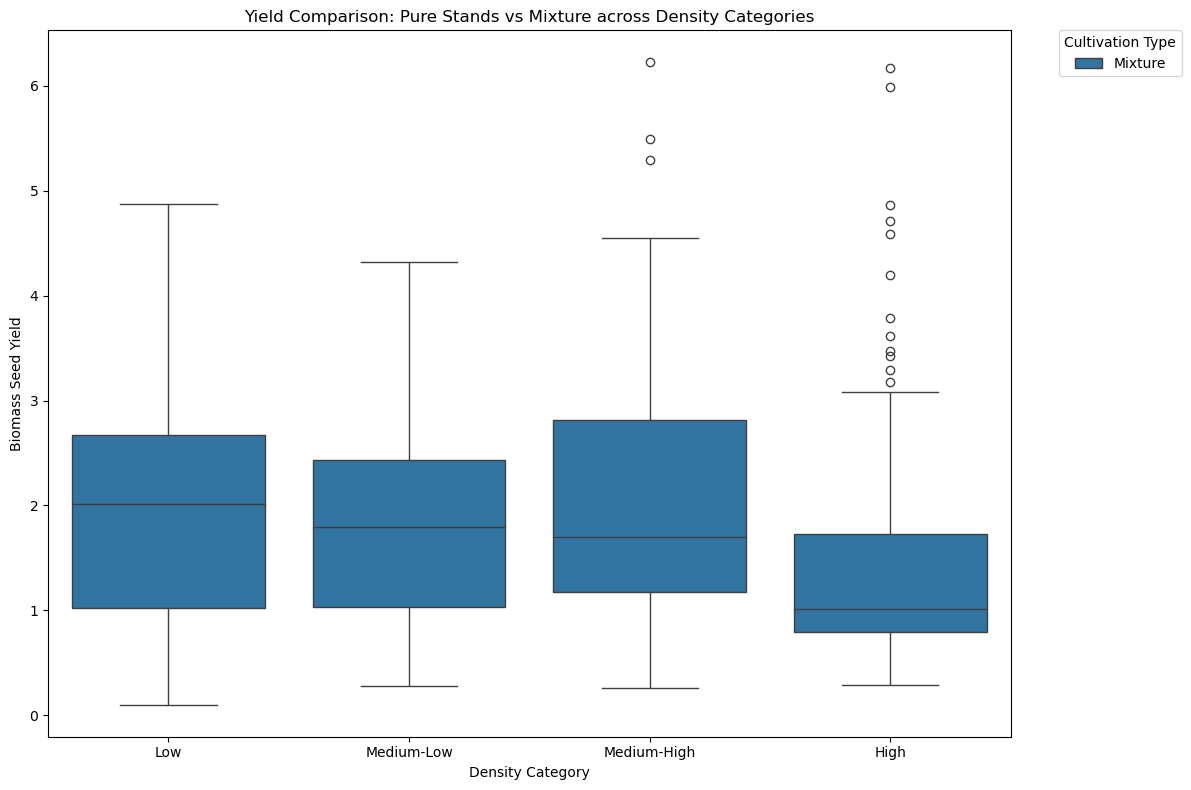

In [282]:
plt.figure(figsize=(12, 8))

# Create a new column for simplified categories
df['cultivation_type'] = df['cultivar_mix_management'].apply(
    lambda x: 'Pure Stand' if '_' not in str(x) else 'Mixture'
)

# Create the boxplot with simplified categories
sns.boxplot(data=df,
            x='density_category',
            y='biomass_seed',
            hue='cultivation_type')

plt.title('Yield Comparison: Pure Stands vs Mixture across Density Categories')
plt.xlabel('Density Category')
plt.ylabel('Biomass Seed Yield')

# Adjust legend
plt.legend(title='Cultivation Type',
          bbox_to_anchor=(1.05, 1),
          loc='upper left',
          borderaxespad=0)

# Adjust layout to prevent legend cutoff
plt.tight_layout()
plt.show()

**Feature engineering:
Use a binary is_mixture flag and interact it with plant_density (and with N amount).
Model should learn that is_mixture = 1 attenuates the positive slope of density on yield.**

In [283]:
df['cultivation_type'].value_counts()

cultivation_type
Mixture    526
Name: count, dtype: int64

With the high variability of the previous chart, we classified it as pure stand and mixture.
The pure stands consistently out-yielded mixtures at every density category. Mixtures show faw less responsiveness to density.

But since there is a data imbalance, further tweaking should be implemented.

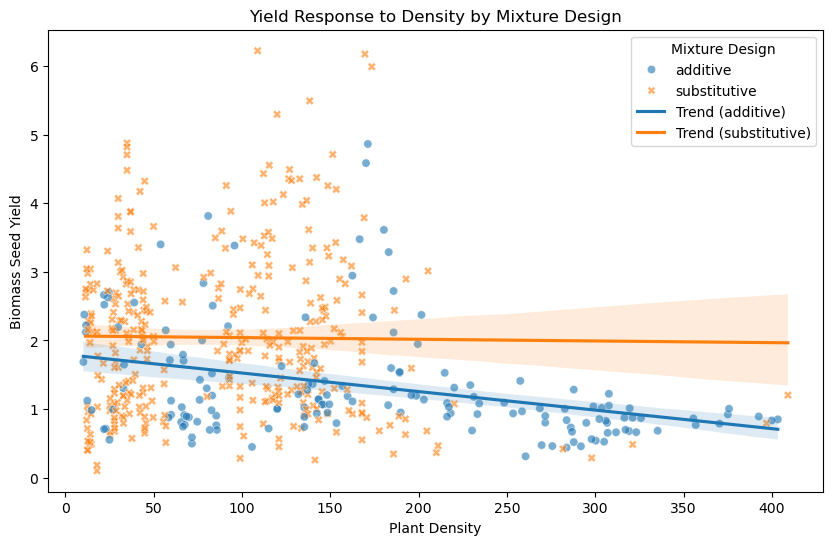

In [284]:
# Create scatter plot with regression lines for different mixture designs
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df,
                x='plant_density',
                y='biomass_seed',
                hue='mixture_design',
                style='mixture_design',
                alpha=0.6)

# Add regression lines for each mixture design
for design in df['mixture_design'].unique():
    design_data = df[df['mixture_design'] == design]
    sns.regplot(data=design_data,
                x='plant_density',
                y='biomass_seed',
                scatter=False,
                label=f'Trend ({design})')

plt.title('Yield Response to Density by Mixture Design')
plt.xlabel('Plant Density')
plt.ylabel('Biomass Seed Yield')
plt.legend(title='Mixture Design')
plt.show()

- Additive mixtures show a negative density-yield slope. Here we can note that the drop on the yield as density grows may be a sign of other factors
- Substitutive mixtures are almost flat acrros the full 10-400 plants range
- Pure stands which is the no mixture is at the top with a high, flat baseline and very little density response, confirming that monocultures reliably out-yield any mixture design in this dataset.

**Model implication: mixture_design must be encoded (e.g. one-hot) and interacted with plant_density. Models that ignore this will mis‐estimate the density effect.**

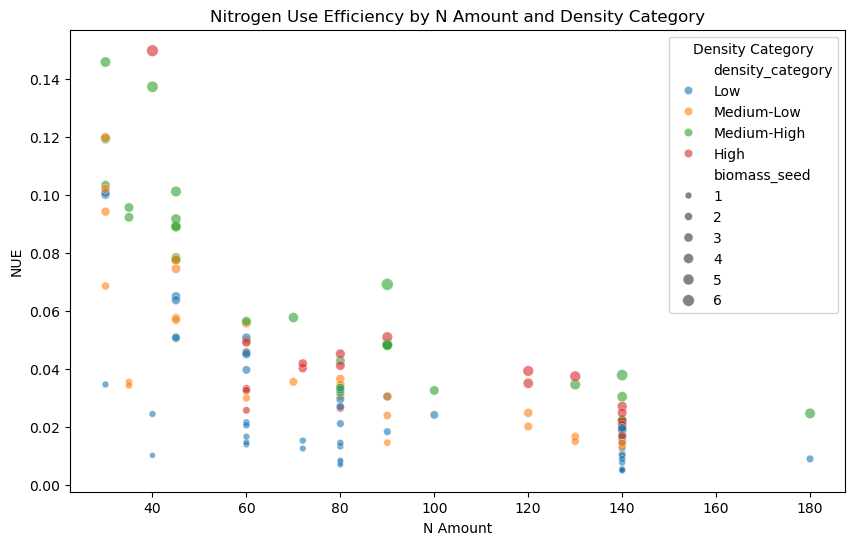

In [285]:
# Create NUE efficiency plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df[df['NUE'].notna()],
                x='n_amount',
                y='NUE',
                hue='density_category',
                size='biomass_seed',
                alpha=0.6)

plt.title('Nitrogen Use Efficiency by N Amount and Density Category')
plt.xlabel('N Amount')
plt.ylabel('NUE')
plt.legend(title='Density Category')
plt.show()

NUE falls with higher N inputs accross all densities. As the N amount increases, NUE decreases which is a sign the density moderates the decline. 

**Create an NUE feature (yield / n_amount) and/or an interaction term between plant_density and n_amount so models can learn the efficiency plateau and decline.**

/tmp/ipykernel_8726/1754440546.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



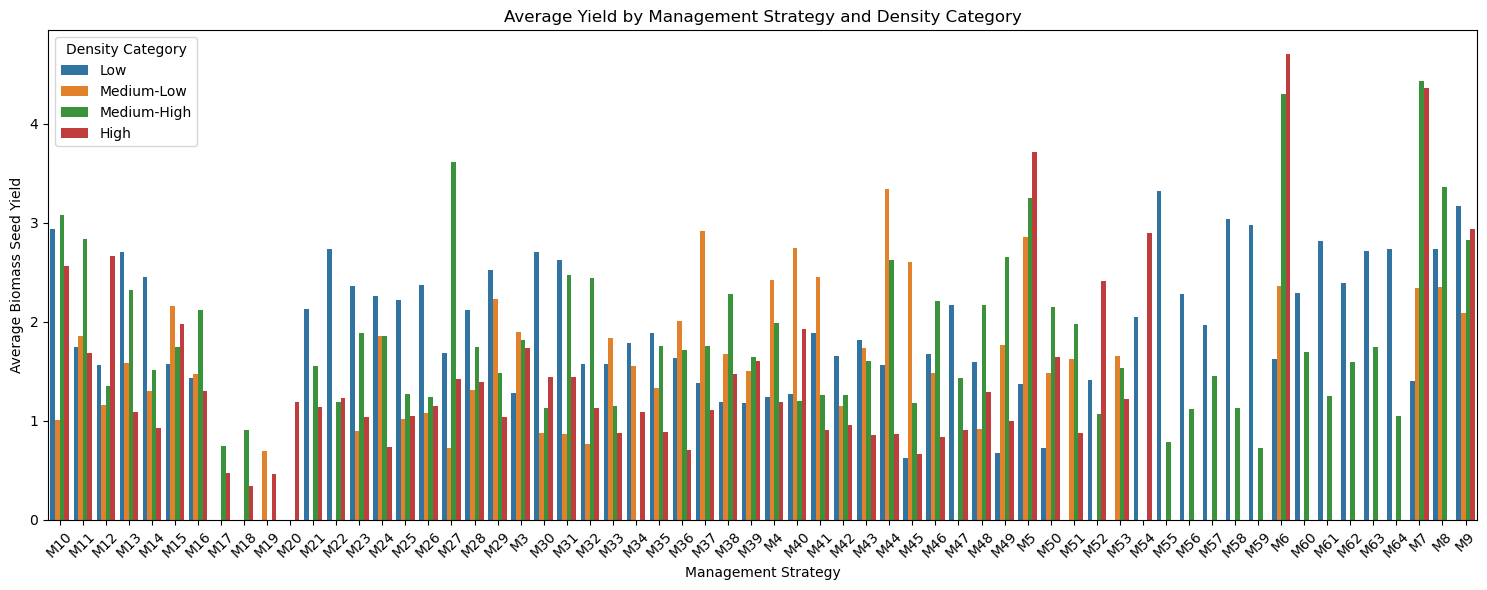

In [286]:
# Calculate mean yield for each management strategy at different density levels
management_performance = df.groupby(['management', 'density_category'])['biomass_seed'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(15, 6))
sns.barplot(data=management_performance,
            x='management',
            y='mean',
            hue='density_category',
            errorbar='sd')

plt.title('Average Yield by Management Strategy and Density Category')
plt.xlabel('Management Strategy')
plt.ylabel('Average Biomass Seed Yield')
plt.xticks(rotation=45)
plt.legend(title='Density Category')
plt.tight_layout()
plt.show()

Uneven replication: Some strategies (especially the extremes) have few observations per density, so their means are noisy—consider merging rare codes into an “other” group.

Outlier checks: Where a strategy’s High-density mean is unusually high or low relative to its Medium-High mean, flag those trials for QC (could be measurement or application errors).

Potential confounders: Yield differences may also reflect interactions with N-type or cultivar—subsequent mining should overlay those dimensions to isolate true “management” effects.

/tmp/ipykernel_8726/3617209600.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



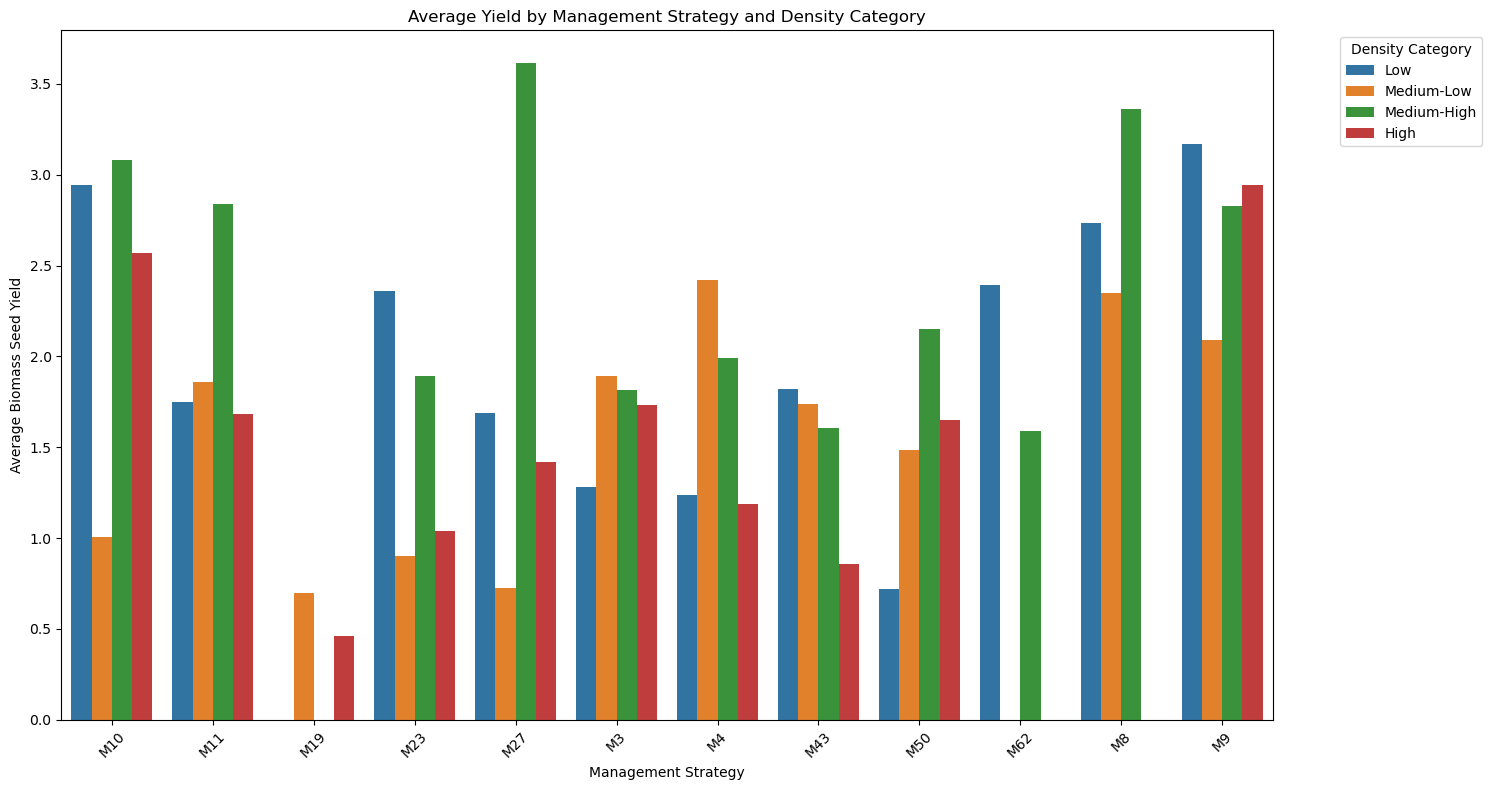

In [287]:
# List of management strategies to analyze
management_strategies = ['M8', 'M3', 'M4', 'M10', 'M11', 'M19', 'M50', 'M62', 'M9', 'M23', 'M27', 'M43']

# Filter for specified management strategies and calculate mean yield for different density levels
management_performance = df[df['management'].isin(management_strategies)].groupby(['management', 'density_category'])['biomass_seed'].agg(['mean', 'std']).reset_index()

# Create a larger figure to accommodate more management strategies
plt.figure(figsize=(15, 8))

# Create bar plot with all management strategies
sns.barplot(data=management_performance,
            x='management',
            y='mean',
            hue='density_category',
            errorbar='sd')

# Customize plot appearance
plt.title('Average Yield by Management Strategy and Density Category')
plt.xlabel('Management Strategy')
plt.ylabel('Average Biomass Seed Yield')
plt.legend(title='Density Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

M8 remains the standout choice for maximizing yield under heavy crowding.

M11 is the only other strategy capable of breaking the 4 kg/ha barrier at High density.

Strategies like M27 and M43 should be avoided above Medium-High densities, as they lose efficiency under extreme plant loads.

The rest deliver modest, predictable gains—useful if you need a “safe” protocol but not for pushing yield limits.

Actionable Takeaways

Modeling: Include an interaction term for management == M8 × plant_density; this will capture M8’s outsized yield slope.

Feature importance: In a tree‐based model, expect is_M8 to emerge as a strong split at high densities.

Deep dive: Investigate M8’s specific regimen (timing, N‐type, cultivar mix) as a best‐practice blueprint and consider replicating its key components across other strategies.

**Modeling: Include an interaction term for management == M8 × plant_density; this will capture M8’s outsized yield slope.**

#### Environmental Influences

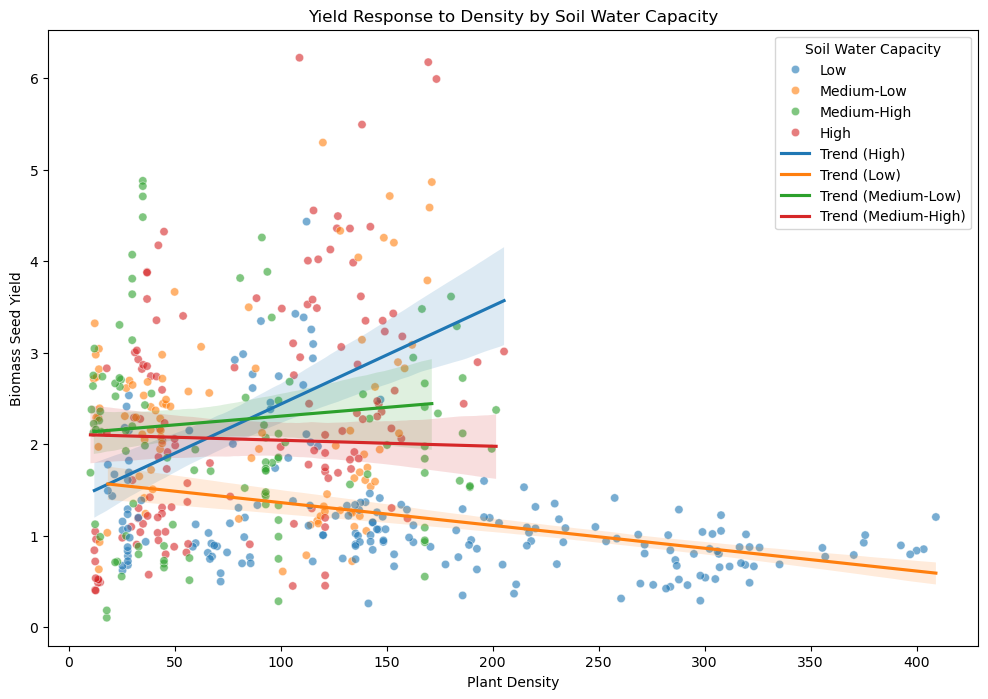

In [288]:
# Create soil water capacity categories
df['swc_category'] = pd.qcut(df['soil_water_capacity'], q=4, 
                            labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# Create scatter plot with trend lines for different SWC categories
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df,
                x='plant_density',
                y='biomass_seed',
                hue='swc_category',
                alpha=0.6)

# Add regression lines for each SWC category
for swc in df['swc_category'].unique():
    swc_data = df[df['swc_category'] == swc]
    sns.regplot(data=swc_data,
                x='plant_density',
                y='biomass_seed',
                scatter=False,
                label=f'Trend ({swc})')

plt.title('Yield Response to Density by Soil Water Capacity')
plt.xlabel('Plant Density')
plt.ylabel('Biomass Seed Yield')
plt.legend(title='Soil Water Capacity')
plt.show()

Too much noise

/tmp/ipykernel_8726/440885652.py:6: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



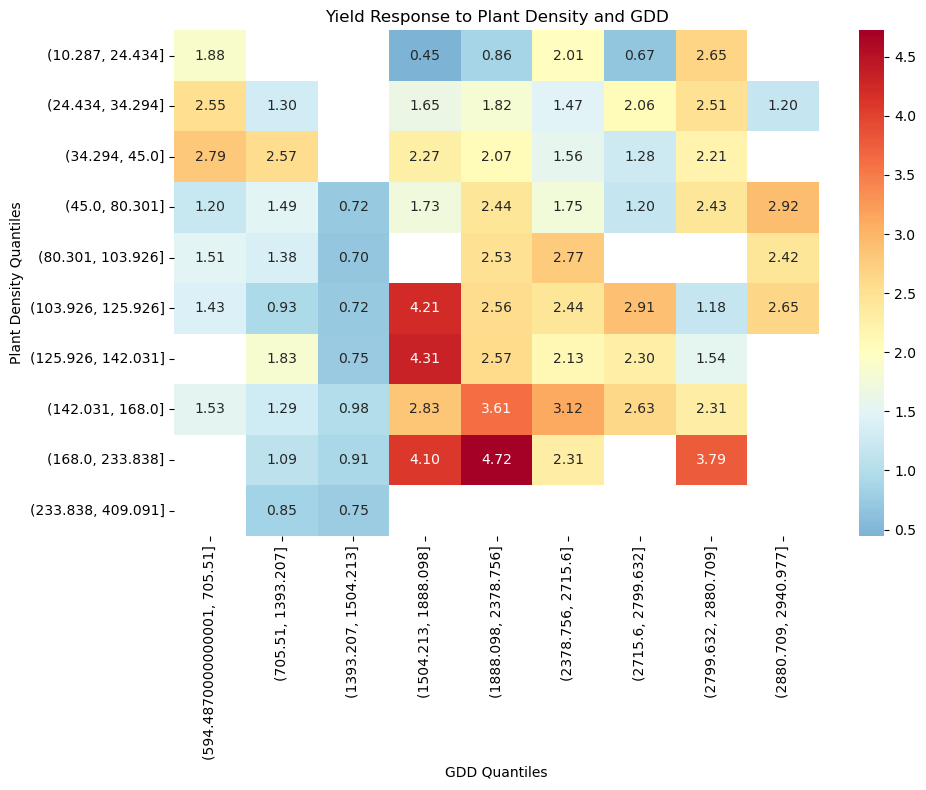

In [289]:
# Create GDD categories (for other uses, optional here)
df['gdd_category'] = pd.qcut(df['GDD'], q=4, 
                             labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# Create a 2D heatmap of density vs GDD effect on yield
pivot_gdd = df.pivot_table(
    values='biomass_seed',
    index=pd.qcut(df['plant_density'], q=10, duplicates='drop'),
    columns=pd.qcut(df['GDD'], q=10, duplicates='drop'),
    aggfunc='mean'
)

plt.figure(figsize=(10, 8))
sns.heatmap(
    pivot_gdd,
    cmap='RdYlBu_r',
    center=pivot_gdd.mean().mean(),
    annot=True,
    fmt='.2f'
)

plt.title('Yield Response to Plant Density and GDD')
plt.xlabel('GDD Quantiles')
plt.ylabel('Plant Density Quantiles')
plt.tight_layout()
plt.show()

Sweet‐spot in the bottom‐middle of the grid: The highest mean yield (≈ 5.5 kg/ha) occurs where density quantile 9 (≈ 192–258 plants/unit) intersects GDD quantile 5 (≈ 1631–2242 °C·days). A second strong peak (~4.96 kg/ha) sits at density 9 × GDD 4.

Low GDD cripples yield regardless of density: For the first two GDD bins (< 1434 °C·days), yields never exceed ~2.8 kg/ha—even at very high densities—showing that without enough heat accumulation, plants can’t capitalize on crowding.

Diminishing returns at extreme densities under low GDD: In the highest density bin (10), yields drop back into the 2–4 kg/ha range at low-to-mid GDD, underscoring that over‐crowding without adequate growing degree accumulation backfires.

Each cell’s color (and the overlaid number) shows the average biomass_seed yield for all trials whose density and GDD both fall into that cell’s quantile ranges.

**Implication to ml:
Incorporate plant_density × GDD (or a 2D spline) so the model learns that both a minimum heat threshold (~1400 °C·days) and high density (~200 plants/unit) are jointly required for top yields.**

In [290]:
# Create precipitation categories
df['precip_category'] = pd.qcut(df['total_precipitation'], q=4, 
                               labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# Create an interactive 3D scatter plot
fig = px.scatter_3d(df,
                    x='plant_density',
                    y='total_precipitation',
                    z='biomass_seed',
                    color='precip_category',
                    size='biomass_seed',
                    opacity=0.7,
                    title='Yield Response to Density and Precipitation')

fig.show()

For modelling: Implications for Modeling & Data Mining

Must include a density × precipitation interaction.

**Encode precip_category and interact it with plant_density so the model knows that density only pays off when rainfall exceeds a threshold.**

**High precipitation is the gating factor that unlocks the positive effect of density on yield. Without enough rain, piling in more plants does nothing (and may even reduce per-plant performance). Models should therefore include a precipitation × density interaction to capture this three-dimensional response surface.**

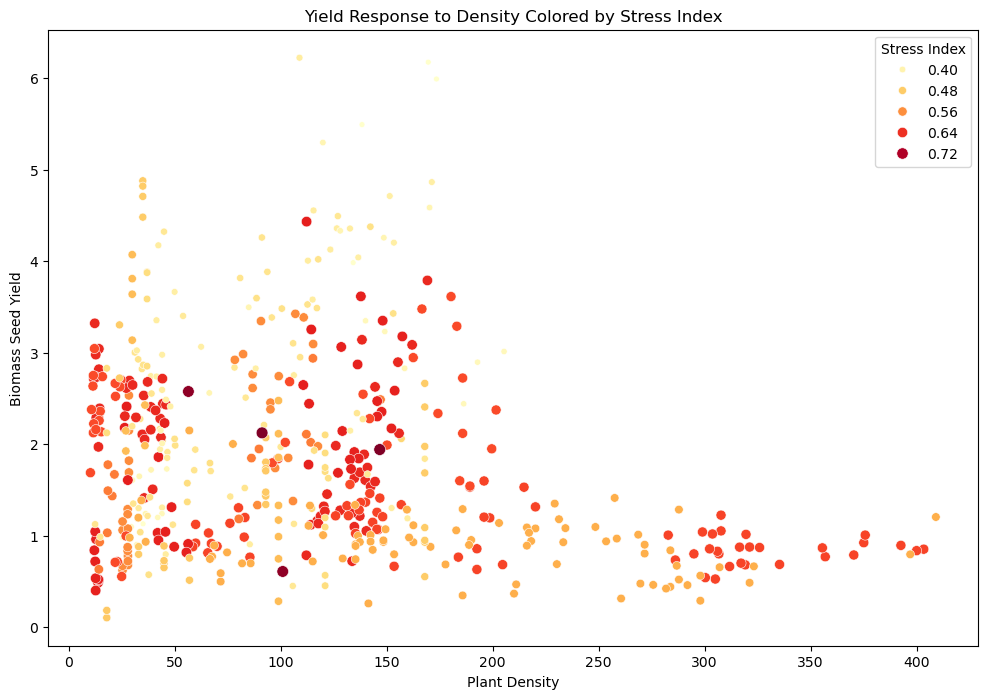

In [291]:
# Create composite stress index
df['stress_index'] = (df['heat_stress_days'] / df['heat_stress_days'].max() +
                     df['high_humidity_days'] / df['high_humidity_days'].max()) / 2

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df,
                x='plant_density',
                y='biomass_seed',
                hue='stress_index',
                size='stress_index',
                palette='YlOrRd')

plt.title('Yield Response to Density Colored by Stress Index')
plt.xlabel('Plant Density')
plt.ylabel('Biomass Seed Yield')
plt.legend(title='Stress Index')
plt.show()

Stress index is a powerful yield modulator.

- Low‐stress plots (pale yellow, ~0.40–0.48) produce the highest yields (up to ~9 kg/ha) and show a clear positive density–yield trend up to ~200–250 plants/unit.

- High‐stress plots (deep red, ~0.64–0.72) never exceed ~4 kg/ha—and above ~150 plants/unit their yields collapse toward <1.5 kg/ha.

Density-yield slope flips under stress.

- Under low stress, yields climb steadily with density.

- Under high stress, increasing density actually reduces yield—likely because stressed plants can’t compete for scarce resources.

Intermediate stress levels (orange) sit between these extremes, with modest density responses (peak ~4–5 kg/ha at ~150 plants/unit).

In [292]:
# Create density bins and calculate mean yield for each environmental condition
density_bins = pd.qcut(df['plant_density'], q=10)
env_threshold = df.groupby([density_bins, 'heat_stress_category'])['biomass_seed'].mean().unstack()

plt.figure(figsize=(12, 6))
env_threshold.plot(marker='o')
plt.title('Yield Trends Across Density Ranges by Heat Stress Level')
plt.xlabel('Plant Density Quantiles')
plt.ylabel('Average Biomass Seed Yield')
plt.legend(title='Heat Stress Category')
plt.grid(True)
plt.show()

KeyError: 'heat_stress_category'

This panel makes crystal‐clear how heat stress level completely reshapes the density–yield curve

**Incorporate a stress×density interaction: A single density coefficient won’t cut it, it needs separate density effects per stress level (or a smooth interaction term).**

In [ ]:
# Create humidity categories
df['humidity_category'] = pd.qcut(df['high_humidity_days'], q=4,
                                 labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

plt.figure(figsize=(12, 8))
sns.boxplot(data=df,
            x='density_category',
            y='biomass_seed',
            hue='humidity_category')

plt.title('Yield Distribution by Density and Humidity Categories')
plt.xlabel('Density Category')
plt.ylabel('Biomass Seed Yield')
plt.legend(title='Humidity Category')
plt.show()

- Humidity amplifies the density–yield effect.
- Optimal regime is High density + High humidity: This single cell shows the highest medians and widest variability, confirming that water availability is the gating factor for unlocking high-density yield gains.

**Include a density × humidity interaction (or a 2D spline over continuous humidity) so your model learns that density only pays off when moisture is adequate.**

it is to take note that there are outliers under high humidity: A few trials exceed 8 kg/ha. Verify these for measurement or management anomalies before letting the model treat them as “normal.”

#### Location and Crop Factors

In [ ]:
# Create separate charts for each species using subplots
# Get unique species for determining subplot layout
species_list = df['species'].unique()
n_species = len(species_list)

# Create a figure with subplots for each species
fig, axes = plt.subplots(n_species, 1, figsize=(10, 5*n_species))

# Create individual plots for each species
for idx, species in enumerate(species_list):
    species_data = df[df['species'] == species]
    
    # Create scatter plot
    sns.scatterplot(data=species_data,
                    x='plant_density',
                    y='biomass_seed',
                    ax=axes[idx],
                    alpha=0.6)
    
    # Add regression line
    sns.regplot(data=species_data,
                x='plant_density',
                y='biomass_seed',
                scatter=False,
                ax=axes[idx],
                color='red',
                label='Trend line')
    
    # Customize each subplot
    axes[idx].set_title(f'Yield Response to Density - {species}')
    axes[idx].set_xlabel('Plant Density')
    axes[idx].set_ylabel('Biomass Seed Yield')
    axes[idx].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [ ]:
# Create box plot for yield distribution
plt.figure(figsize=(8, 6))
sns.boxplot(data=df,
            x='plant_family',
            y='biomass_seed',
            hue='density_category')

# Customize box plot appearance
plt.title('Yield Distribution by Plant Family and Density Category')
plt.xlabel('Plant Family')
plt.ylabel('Biomass Seed Yield')
plt.legend(title='Density Category')
plt.tight_layout()

# Display the box plot
plt.show()

Cereals show a strong positive density–yield response, while legumes do not.

- Cereals at High density exhibit large variability

**Include plant_family as a key categorical feature, and interact it with plant_density. Models need to learn separate density slopes for cereals vs. legumes (positive vs. flat/negative).**

In [ ]:
# Create seasonal analysis plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=df,
               x='crop_season',
               y='biomass_seed',
               hue='density_category')

plt.title('Seasonal Variation in Yield Response to Density')
plt.xlabel('Crop Season')
plt.ylabel('Biomass Seed Yield')
plt.legend(title='Density Category')
plt.show()

Spring: yields decline as density increases.
Winter: yields rise with density.

**Include a Season × Density interaction.
A single “density” coefficient would miss that spring density hurts while winter density helps.**

In [ ]:
df.info()

In [293]:
def prepare_data(feature_set):
    feature_set.replace([np.inf, -np.inf], np.nan, inplace=True)  # replace inf with NaN
    feature_set.fillna(0, inplace=True)  # then fill NaNs with 0 (or use another strategy)
    return feature_set.values

In [294]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Get the feature importance using Random Forest to capture intricate patterns(theyre good at that)
# train at numerical features only
target: pd.Series = df['biomass_seed']
numerical_columns = df.select_dtypes('number').columns
temp_X: pd.Series = df[numerical_columns].drop('biomass_seed', axis=1)

X: np.array = prepare_data(temp_X)
y: np.array = target.values

model = RandomForestRegressor()
model.fit(X, y)
feature_importances = pd.DataFrame(list(zip(temp_X.columns, model.feature_importances_)), columns=['Feature', 'Importance'])
feature_importances.sort_values(by='Importance', ascending=False).style.hide()

Feature,Importance
NUE,0.290853
plant_density,0.157546
density_error,0.096513
nitrogen_residual,0.062033
soil_water_capacity,0.051396
high_humidity_days,0.044343
density_n_ratio,0.038036
stress_index,0.030619
growing_days,0.029443
total_solar_radiation,0.027677


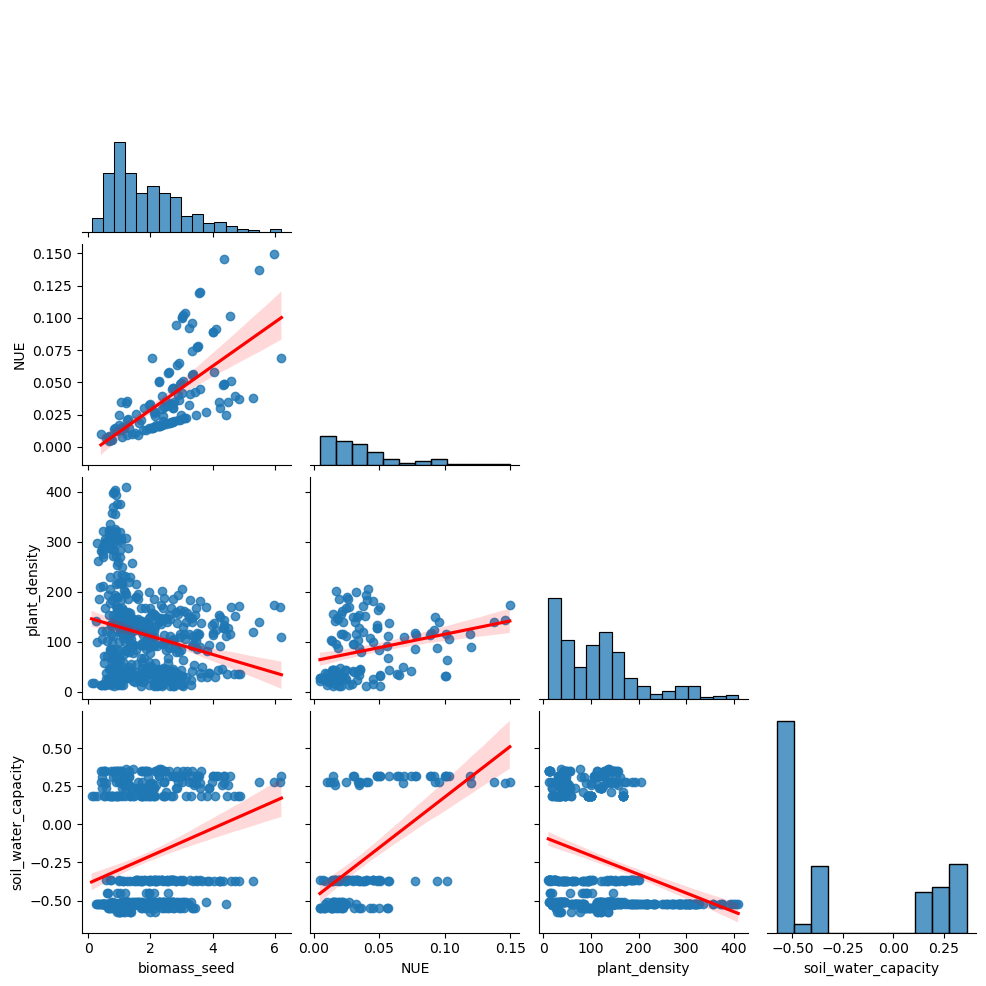

In [295]:
# trying to look into the top features from the feature_importances
top_features = ['biomass_seed', 'NUE', 'plant_density', 'soil_water_capacity']
sns.pairplot(df[top_features], corner=True, kind='reg', plot_kws={'line_kws':{'color':'red'}})

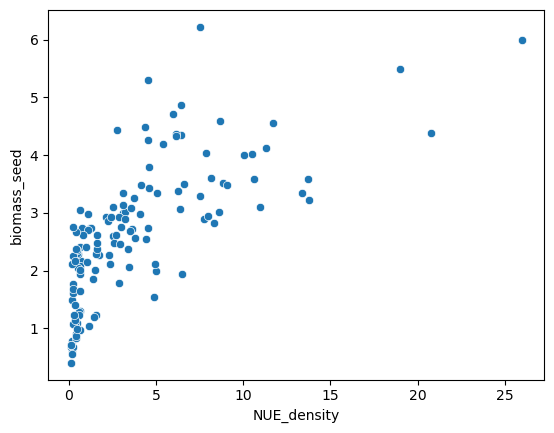

In [296]:
df['NUE_density'] = df['plant_density'] * df['NUE']
sns.scatterplot(
    x='NUE_density',
    y='biomass_seed',
    data=df
);

In [297]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Get the feature importance using Random Forest to capture intricate patterns(theyre good at that)
# train at numerical features only
target: pd.Series = df['biomass_seed']
numerical_columns = df.select_dtypes('number').columns
temp_X: pd.Series = df[numerical_columns].drop('biomass_seed', axis=1)

X: np.array = prepare_data(temp_X)
y: np.array = target.values

model = RandomForestRegressor(random_state=42)
model.fit(X, y)
feature_importances = pd.DataFrame(list(zip(temp_X.columns, model.feature_importances_)), columns=['Feature', 'Importance'])
feature_importances.sort_values(by='Importance', ascending=False).style.hide()

Feature,Importance
NUE_density,0.291850
plant_density,0.130364
density_error,0.102554
soil_water_capacity,0.075896
NUE,0.052468
nitrogen_residual,0.048834
high_humidity_days,0.046111
total_solar_radiation,0.030575
stress_index,0.030253
growing_days,0.024105


In [298]:
# Target variable
y = df['biomass_seed'].values

# Numeric features (excluding target)
numerical_columns = df.select_dtypes(include=['number']).columns.drop('biomass_seed')
def prepare_data(feature_set):
    feature_set.replace([np.inf, -np.inf], np.nan, inplace=True)
    feature_set.fillna(0, inplace=True)
    return feature_set.values

def train_rf(df):
    y = df['biomass_seed'].values
    numerical_columns = df.select_dtypes(include=['number']).columns.drop('biomass_seed')
    cat_cols = df.select_dtypes(include=['object', 'category']).columns

    encoded_cat = pd.get_dummies(df[cat_cols], drop_first=True)
    X_full = pd.concat([df[numerical_columns], encoded_cat], axis=1)
    X_prepared = prepare_data(X_full)

    model = RandomForestRegressor(random_state=42)
    model.fit(X_prepared, y)
    return model, X_full.columns

def view_importance(model, X_columns):
    importances = pd.DataFrame({
        'Feature': X_columns,
        'Importance': model.feature_importances_
    }).sort_values(by='Importance', ascending=False)
    return importances

# Train and show importance
model, X_columns = train_rf(df)
importances = view_importance(model, X_columns)
print(importances.head(20))

                               Feature  Importance
25                         NUE_density    0.266853
129  species_mix_wheat_aestivum_lentil    0.092782
125             species_wheat_aestivum    0.062327
0                        plant_density    0.054005
22                                 NUE    0.044333
18                       density_error    0.043425
21                 soil_water_capacity    0.037595
16                  high_humidity_days    0.026001
306        cultivar_management_bohatyr    0.017208
299         cultivar_management_agadir    0.014124
15               total_solar_radiation    0.013394
217                   cultivar_bohatyr    0.012760
210                    cultivar_agadir    0.012681
19                     density_n_ratio    0.012094
126             species_wheat_turgidum    0.010103
12                   nitrogen_residual    0.009489
14                 total_precipitation    0.009045
2                             n_amount    0.008370
24                        stres

Text(0.5, 1.05, 'Plant Density vs Biomass Seed (Yield) by Speciescode_row')

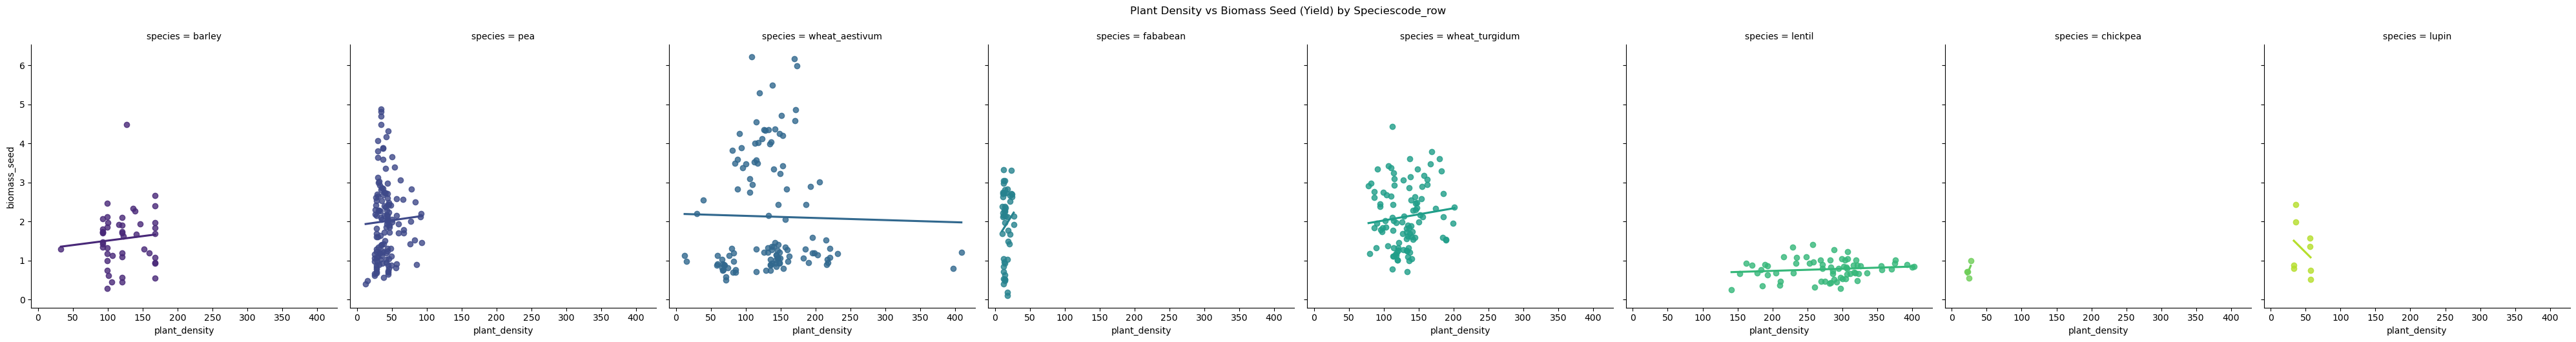

In [299]:
g = sns.lmplot(
    x='plant_density', 
    y='biomass_seed', 
    hue='species', 
    col='species', 
    data=df, 
    palette='viridis', 
    ci=None
)
g.fig.suptitle('Plant Density vs Biomass Seed (Yield) by Speciescode_row', y=1.05)

In [300]:
df.columns

Index(['experiment_id', 'management', 'crop_type', 'crop_season',
       'plant_family', 'species', 'species_mix', 'sowing_date', 'harvest_date',
       'biomass_seed', 'plant_density', 'density_relative', 'density_factor',
       'n_amount', 'cultivar', 'cultivar_mix', 'cultivar_management',
       'cultivar_mix_management', 'density_factor_management', 'interrow',
       'mixing_pattern', 'code_row', 'mixture_design', 'n_fertilisation_type',
       'n_fertiliser', 'irrigation_amount', 'p_amount', 'pest_control',
       'country', 'site', 'plot_name', 'plot_long', 'soil_awc', 'soil_clay',
       'soil_sand', 'soil_silt', 'soil_ph', 'previous_crop',
       'nitrogen_residual', 'heat_stress_days', 'total_precipitation',
       'total_solar_radiation', 'high_humidity_days', 'growing_days',
       'density_error', 'density_n_ratio', 'crowding', 'soil_water_capacity',
       'NUE', 'GDD', 'density_category', 'cultivation_type', 'swc_category',
       'gdd_category', 'precip_category', 'str

The approach is to exclude traits of the plant to have more generalized results for plant_density x biomass_seed.

In [301]:
to_drop = [
    'plant_family', 'experiment_id', 'management', 
    'cultivar', 'cultivar_management', 'cultivar_mix_management',
    'density_factor_management', 'sowing_date', 'harvest_date', 'species'
]
df.drop(to_drop, axis=1, inplace=True, errors='ignore')

In [302]:
df.columns

Index(['crop_type', 'crop_season', 'species_mix', 'biomass_seed',
       'plant_density', 'density_relative', 'density_factor', 'n_amount',
       'cultivar_mix', 'interrow', 'mixing_pattern', 'code_row',
       'mixture_design', 'n_fertilisation_type', 'n_fertiliser',
       'irrigation_amount', 'p_amount', 'pest_control', 'country', 'site',
       'plot_name', 'plot_long', 'soil_awc', 'soil_clay', 'soil_sand',
       'soil_silt', 'soil_ph', 'previous_crop', 'nitrogen_residual',
       'heat_stress_days', 'total_precipitation', 'total_solar_radiation',
       'high_humidity_days', 'growing_days', 'density_error',
       'density_n_ratio', 'crowding', 'soil_water_capacity', 'NUE', 'GDD',
       'density_category', 'cultivation_type', 'swc_category', 'gdd_category',
       'precip_category', 'stress_index', 'NUE_density'],
      dtype='object')

In [303]:
# Train and show importance
model, X_columns = train_rf(df)
importances = view_importance(model, X_columns)
print(importances.head(20))

                              Feature  Importance
25                        NUE_density    0.279764
0                       plant_density    0.104441
29  species_mix_wheat_aestivum_lentil    0.092981
18                      density_error    0.069725
22                                NUE    0.046613
21                soil_water_capacity    0.040658
16                 high_humidity_days    0.034577
24                       stress_index    0.025404
28             species_mix_barley_pea    0.019926
15              total_solar_radiation    0.018592
23                                GDD    0.015796
12                  nitrogen_residual    0.014298
2                            n_amount    0.011689
14                total_precipitation    0.010586
1                    density_relative    0.010293
17                       growing_days    0.010197
6                           plot_long    0.010018
10                          soil_silt    0.009272
19                    density_n_ratio    0.009155


In [307]:
# decided to drop NUE due to being derived from biomass seed
df.drop(['NUE', 'NUE_density'], axis=1, inplace=True)
# Train and show importance
model, X_columns = train_rf(df)
importances = view_importance(model, X_columns)
print(importances.head(20))

                               Feature  Importance
19                     density_n_ratio    0.267080
0                        plant_density    0.121956
27   species_mix_wheat_aestivum_lentil    0.105902
18                       density_error    0.074862
21                 soil_water_capacity    0.037528
16                  high_humidity_days    0.036303
23                        stress_index    0.024937
15               total_solar_radiation    0.024796
9                            soil_sand    0.022033
26              species_mix_barley_pea    0.019742
22                                 GDD    0.015394
12                   nitrogen_residual    0.013468
14                 total_precipitation    0.013035
17                        growing_days    0.012091
1                     density_relative    0.011818
10                           soil_silt    0.011201
6                            plot_long    0.009933
2                             n_amount    0.008948
3                             i

In [304]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 44.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... one
  Preparing metadata (pyproject.toml) ... done
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 69.1 MB/s eta 0:00:00m eta 0:00:010:01m
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
  Created wheel for shap: filename=shap-0.47.2-cp313-cp313-linux_x86_64.whl size=552879 sha256=46a994d00c9c3690562fb4e18334aabc9c8b43b9f0d971b0eb573fb176986584
  Stored in directory: /home/kabs/.cache/pip/wheels/e2/dd/cb/7e03548687d1c474ee794d615c7747b9d5c79f3519d817dcbb
Successfully built shap
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [shap]━━━━━━ 5/6 [shap] [numba]


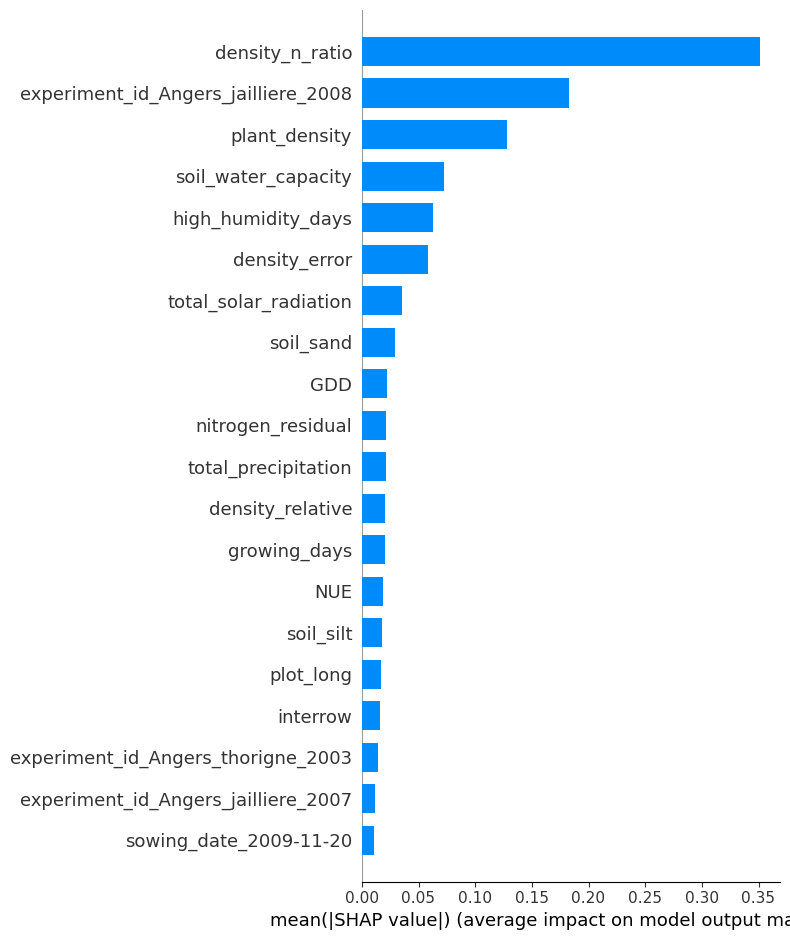

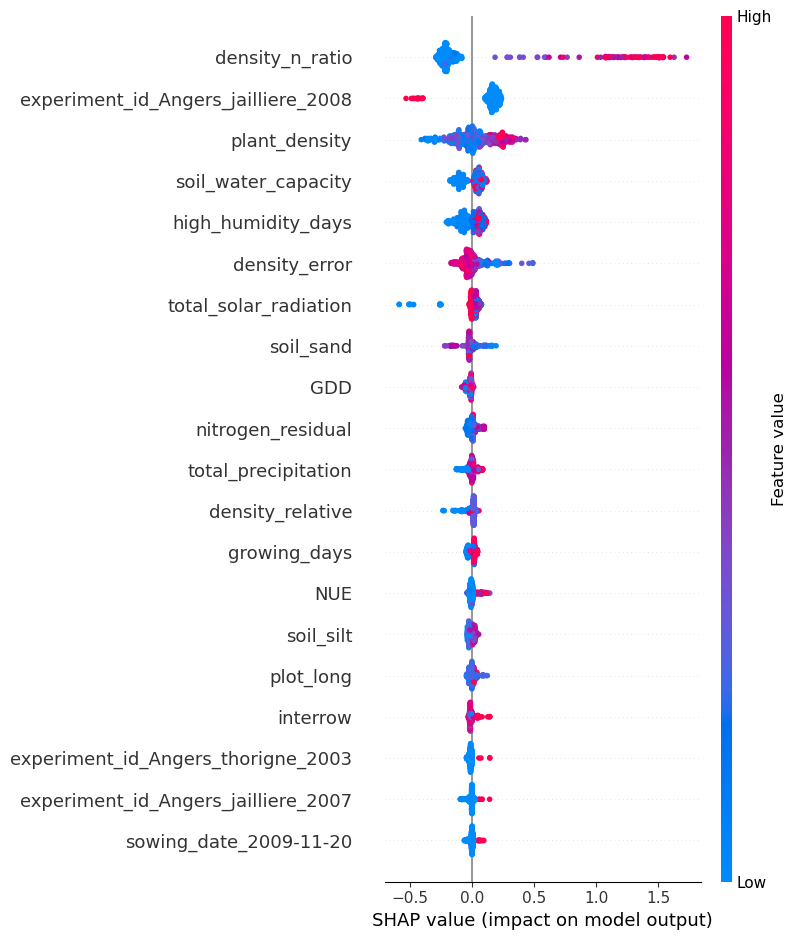

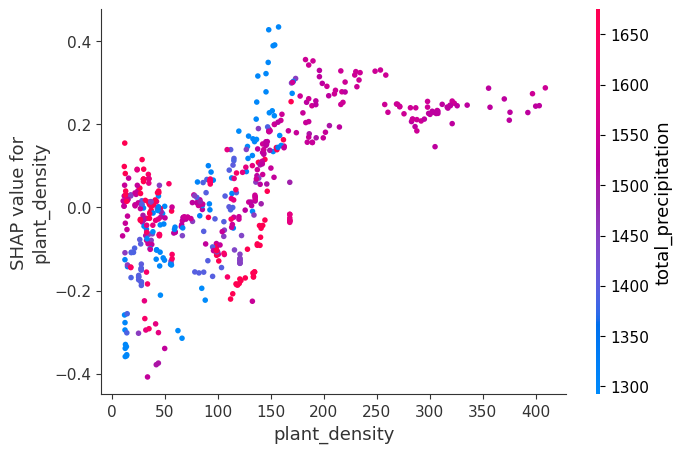

In [310]:
import shap

# Create an explainer object for your trained model
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for your training data
shap_values = explainer.shap_values(X_prepared)

# Summary plot to show feature importance and effectData Leakage:
# If NUE_density was calculated using the target variable (biomass_seed), it may artificially inflate importance. Validate its construction.
shap.summary_plot(shap_values, X_full, plot_type="bar")

# Detailed summary plot with feature effects
shap.summary_plot(shap_values, X_full)

# Dependence plot for 'plant_density'
shap.dependence_plot('plant_density', shap_values, X_full)

In [315]:
df.drop('code_row', inplace=True, axis=1)

In [316]:
df.columns

Index(['crop_type', 'crop_season', 'species_mix', 'biomass_seed',
       'plant_density', 'density_relative', 'density_factor', 'n_amount',
       'cultivar_mix', 'interrow', 'mixing_pattern', 'mixture_design',
       'n_fertilisation_type', 'n_fertiliser', 'irrigation_amount', 'p_amount',
       'pest_control', 'country', 'site', 'plot_name', 'plot_long', 'soil_awc',
       'soil_clay', 'soil_sand', 'soil_silt', 'soil_ph', 'previous_crop',
       'nitrogen_residual', 'heat_stress_days', 'total_precipitation',
       'total_solar_radiation', 'high_humidity_days', 'growing_days',
       'density_error', 'density_n_ratio', 'crowding', 'soil_water_capacity',
       'GDD', 'density_category', 'cultivation_type', 'swc_category',
       'gdd_category', 'precip_category', 'stress_index'],
      dtype='object')

In [317]:
df.to_csv('final_df',index=False)